# 【問題1】コンペティション内容の確認
コンペティションのOverviewページ読み、「Home Credit Default Risk」について以下の観点について確認してください。

* 何を学習し、何を予測するのか  
→電話会社や取引情報などのさまざまな代替データを利用して、クライアントの返済能力を予測しています。 
* どのようなファイルを作りKaggleに提出するか  
→テストセットの各SK_ID_CURRについて、TARGET変数の確率を予測したファイル。（ファイルにはヘッダーが含まれる）
* 提出されたものはどういった指標値で評価されるのか  
→ROC曲線面積で評価する

# 【問題2】学習と検証
データを簡単に分析、前処理し、学習、検証するまでの一連の流れを作成・実行してください。

検証にはこのコンペティションで使用される評価指標を用いるようにしてください。学習に用いる手法は指定しません。

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from scipy import stats

In [2]:
# データセットの準備
df = pd.read_csv("application_train.csv")

In [3]:
# データの情報
print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 欠損値の数
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [5]:
# データ型
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

In [6]:
# オブジェクト型の中身確認
# オブジェクトの列を抜き出し
df[df.columns[df.dtypes == "object"]]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
5,Cash loans,M,N,Y,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Other,NaN,NaN,NaN,NaN
6,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Accountants,SUNDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
7,Cash loans,M,Y,Y,Unaccompanied,State servant,Higher education,Married,House / apartment,Managers,MONDAY,Other,NaN,NaN,NaN,NaN
8,Cash loans,F,N,Y,Children,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,WEDNESDAY,XNA,NaN,NaN,NaN,NaN
9,Revolving loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,THURSDAY,Electricity,NaN,NaN,NaN,NaN


In [7]:
# オブジェクトの中身　ユニーク確認
for column in df.columns[df.dtypes == "object"]:
    print("オブジェクトのユニーク : {}".format(df[column].unique()))
    print("数 : {}\n".format(len(df[column].unique())))

オブジェクトのユニーク : ['Cash loans' 'Revolving loans']
数 : 2

オブジェクトのユニーク : ['M' 'F' 'XNA']
数 : 3

オブジェクトのユニーク : ['N' 'Y']
数 : 2

オブジェクトのユニーク : ['Y' 'N']
数 : 2

オブジェクトのユニーク : ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
数 : 8

オブジェクトのユニーク : ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
数 : 8

オブジェクトのユニーク : ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
数 : 5

オブジェクトのユニーク : ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
数 : 6

オブジェクトのユニーク : ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
数 : 6

オブジェクトのユニーク : ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Wait

In [8]:
# 欠損値の対応
# オブジェクトは最頻値で埋める
# 数字は平均値で埋める

# for + fillnaでオブジェクト欠損値を最頻値で埋める
# modeはの数値にアクセスするには[0]スライスが必要
df_obj = df.select_dtypes(include = ['object'])
for col_obj in df_obj.columns:
    df[col_obj] = df[col_obj].fillna(df_obj[col_obj].mode()[0])
    
# 数値の列名を取得
df_num = df.select_dtypes(include = ['float64', 'int64'])
for col_num in df_num.columns:
    df[col_num] = df[col_num].fillna(df_num[col_num].mean())

In [9]:
# obuject型の欠損値が埋められたか確認
df.select_dtypes(include = ['object']).isnull().sum().sum()

0

In [10]:
# 数字型の欠損値が埋められたか確認
df.select_dtypes(include = ['float64', 'int64']).isnull().sum().sum()

0

In [11]:
# 再度、欠損値の数を確認
df.isnull().sum().sum()

0

In [12]:
# 各オブジェクトをダミー処理
df_dummy = list(df.select_dtypes(include='object').columns)
df = pd.concat([df, pd.get_dummies(df[df_dummy])], axis = 1, sort = False)
df.drop(columns = df[df_dummy], inplace = True)

In [13]:
df.shape

(307511, 246)

In [14]:
# 分割
from sklearn.model_selection import train_test_split
# Xとyに分割
y = df[["TARGET"]].copy()
df.drop(columns = "TARGET", inplace = True)
X = df.copy()
# ndarray変換
X_array = X.values
# yに関して一次元化（グラフ化で必要）
# y_array = np.ravel(y.values)
# この段階で一次元化すると標準化できない
y_array = y.values

X_train, X_valid, y_train, y_valid = train_test_split(
    X_array, y_array, test_size=0.25, random_state=0)

y_train

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [15]:
# 各特徴量の標準化
from sklearn.preprocessing import StandardScaler
# X、yを分けてインスタンス化
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_std = scaler_X.fit_transform(X_train)
X_valid_std = scaler_X.transform(X_valid)
# yの標準化はしない・・・０、１だから
#y_train_std = scaler_y.fit_transform(y_train)
#y_valid_std = scaler_y.transform(y_valid)

# yの一次元化(グラフ化の際に必要？)
#y_train_std = np.ravel(y_train_std)
#y_valid_std =np.ravel(y_valid_std)

In [16]:
# 決定木
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()
dtree.fit(X_train_std, y_train)
# DecisionTreeRegressorでの推定
y_train_predict_dtree = dtree.predict(X_train_std)

In [17]:
# 一次元化
y_train = np.ravel(y_train)
y_train_predict_dtree = np.ravel(y_train_predict_dtree)

print(y_train)
print(y_train_predict_dtree)

[0 0 0 ... 1 1 0]
[0. 0. 0. ... 1. 1. 0.]


In [18]:
# DecisionTreeRegressor　ROCによる評価
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# trainの結果
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict_dtree)
print('train\nfpr：', fpr_train)
print('tpr：', tpr_train)
print('thresholds：', thresholds_train)
print("roc_auc_score : ", roc_auc_score(y_train, y_train_predict_dtree))

# validの結果
y_valid_predict_dtree = dtree.predict(X_valid_std)
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_predict_dtree, drop_intermediate=False)
print('\nvalid\nfpr：', fpr_valid)
print('tpr：', tpr_valid)
print('thresholds：', thresholds_valid)
print("roc_auc_score : ", roc_auc_score(y_valid, y_valid_predict_dtree))

train
fpr： [0. 0. 1.]
tpr： [0. 1. 1.]
thresholds： [2. 1. 0.]
roc_auc_score :  1.0

valid
fpr： [0.         0.08898527 1.        ]
tpr： [0.         0.17123625 1.        ]
thresholds： [2. 1. 0.]
roc_auc_score :  0.5411254922745489


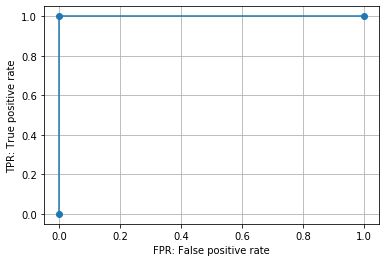

In [19]:
# DecisionTreeRegressor
# trainのROC曲線
plt.plot(fpr_train, tpr_train, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid();

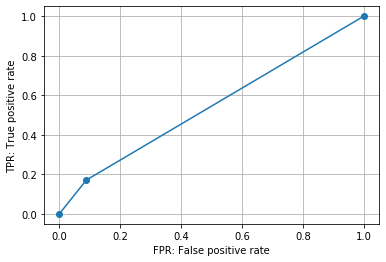

In [20]:
# DecisionTreeRegressor
# validのROC曲線
plt.plot(fpr_valid, tpr_valid, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid();

In [21]:
# 分類機の関数
def ml_def(X_tr, y_tr, X_va, y_va, model):

    model.fit(X_tr, y_tr)
    y_train_predict_model = model.predict(X_tr)
    # 一次元化
    y_train_predict_model = np.ravel(y_train_predict_model)
    # ROCによる評価
    # trainの結果
    fpr_train_model, tpr_train_model, thresholds_train_model = roc_curve(y_tr, y_train_predict_model)
    print('train\nfpr：', fpr_train_model)
    print('tpr：', tpr_train_model)
    print('thresholds：', thresholds_train_model)
    print("roc_auc_score : ", roc_auc_score(y_tr, y_train_predict_model))

    # validの結果
    y_valid_predict_model = model.predict(X_va)
    fpr_valid_model, tpr_valid_model, thresholds_valid_model = roc_curve(y_va, y_valid_predict_model, drop_intermediate=False)
    print('\nvalid\nfpr：', fpr_valid_model)
    print('tpr：', tpr_valid_model)
    print('thresholds：', thresholds_valid_model)
    print("roc_auc_score : ", roc_auc_score(y_va, y_valid_predict_model))
    
    # trainのROC曲線
    plt.figure()
    plt.plot(fpr_train_model, tpr_train_model, marker='o')
    plt.xlabel('FPR: False positive rate')
    plt.ylabel('TPR: True positive rate')
    plt.title('TRAIN')
    plt.grid()
    
    # validのROC曲線
    plt.figure()
    plt.plot(fpr_valid_model, tpr_valid_model, marker='o')
    plt.xlabel('FPR: False positive rate')
    plt.ylabel('TPR: True positive rate')
    plt.title('VALID')
    plt.grid();

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train
fpr： [0.00000000e+00 1.88769178e-05 1.00000000e+00]
tpr： [0.         0.81739084 1.        ]
thresholds： [2 1 0]
roc_auc_score :  0.9086859816329232

valid
fpr： [0.         0.00142682 1.        ]
tpr： [0.         0.00935807 1.        ]
thresholds： [2 1 0]
roc_auc_score :  0.5039656268121528


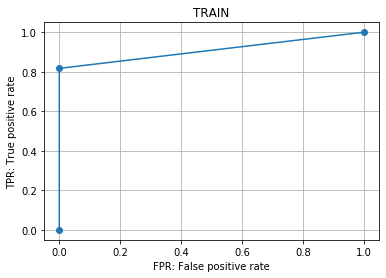

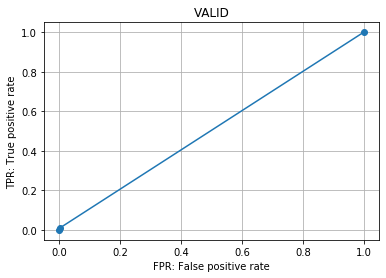

In [22]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
ml_def(X_train_std, y_train, X_valid_std, y_valid, rfc)

In [23]:
# 特徴量の重要度
fti = rfc.feature_importances_

print('Feature Importances:')
for i, feat in enumerate(df.columns):
    print('\t{0:20s} : {1:>.6f}'.format(feat, fti[i]))

Feature Importances:
	SK_ID_CURR           : 0.029561
	CNT_CHILDREN         : 0.006898
	AMT_INCOME_TOTAL     : 0.023679
	AMT_CREDIT           : 0.026788
	AMT_ANNUITY          : 0.028402
	AMT_GOODS_PRICE      : 0.022946
	REGION_POPULATION_RELATIVE : 0.023278
	DAYS_BIRTH           : 0.031719
	DAYS_EMPLOYED        : 0.026712
	DAYS_REGISTRATION    : 0.030149
	DAYS_ID_PUBLISH      : 0.030742
	OWN_CAR_AGE          : 0.012714
	FLAG_MOBIL           : 0.000000
	FLAG_EMP_PHONE       : 0.000826
	FLAG_WORK_PHONE      : 0.004015
	FLAG_CONT_MOBILE     : 0.000212
	FLAG_PHONE           : 0.004239
	FLAG_EMAIL           : 0.002239
	CNT_FAM_MEMBERS      : 0.010110
	REGION_RATING_CLIENT : 0.005119
	REGION_RATING_CLIENT_W_CITY : 0.004729
	HOUR_APPR_PROCESS_START : 0.021364
	REG_REGION_NOT_LIVE_REGION : 0.000959
	REG_REGION_NOT_WORK_REGION : 0.001725
	LIVE_REGION_NOT_WORK_REGION : 0.001589
	REG_CITY_NOT_LIVE_CITY : 0.003708
	REG_CITY_NOT_WORK_CITY : 0.003787
	LIVE_CITY_NOT_WORK_CITY : 0.003953
	EXT_SOURCE_1

In [24]:
# 特徴量の重要度　ソートで高いのサーチ
feat_dict = sorted(dict(zip(fti, df.columns)).items())
feat_dict

[(0.0, 'NAME_FAMILY_STATUS_Unknown'),
 (3.4089191963808657e-06, 'FLAG_DOCUMENT_10'),
 (2.024504851791078e-05, 'ORGANIZATION_TYPE_Trade: type 5'),
 (3.229431713389992e-05, 'ORGANIZATION_TYPE_Industry: type 8'),
 (3.697962451899819e-05, 'FLAG_DOCUMENT_15'),
 (3.9735638363883826e-05, 'NAME_EDUCATION_TYPE_Academic degree'),
 (4.331332473789129e-05, 'FLAG_DOCUMENT_7'),
 (4.530386501554356e-05, 'ORGANIZATION_TYPE_Industry: type 10'),
 (4.790526963450037e-05, 'FLAG_DOCUMENT_20'),
 (4.9029023488023796e-05, 'ORGANIZATION_TYPE_Industry: type 12'),
 (5.0690184028041264e-05, 'ORGANIZATION_TYPE_Religion'),
 (5.43783242076226e-05, 'ORGANIZATION_TYPE_Transport: type 1'),
 (5.6322435818347015e-05, 'FLAG_DOCUMENT_17'),
 (5.800354563525627e-05, 'ORGANIZATION_TYPE_Industry: type 13'),
 (7.163186974559757e-05, 'FLAG_DOCUMENT_21'),
 (7.214366552298685e-05, 'ORGANIZATION_TYPE_Trade: type 4'),
 (8.133714501489172e-05, 'FLAG_DOCUMENT_19'),
 (9.963964529665659e-05, 'FLAG_DOCUMENT_2'),
 (0.00011795713853209006,

決定木、ランダムフォレストともに過学習  
→木の深さに上限を設けて過学習防止

train
fpr： [0.00000000e+00 0.00000000e+00 4.71922944e-06 9.43845889e-06
 1.41576883e-05 2.83153767e-05 8.02269006e-05 1.36857654e-04
 1.79330719e-04 2.31242243e-04 2.40680702e-04 3.20907602e-04
 5.04957551e-04 5.19115239e-04 5.42711386e-04 5.61588304e-04
 6.04061369e-04 6.46534434e-04 8.30584382e-04 8.73057447e-04
 9.72161266e-04 9.95757413e-04 1.04766894e-03 1.12317661e-03
 1.16564967e-03 1.21284197e-03 1.34026116e-03 1.40161114e-03
 1.42992652e-03 1.46296113e-03 1.52431111e-03 2.10949556e-03
 2.26051090e-03 2.40208779e-03 2.43984162e-03 2.50591083e-03
 2.53422621e-03 2.60973388e-03 2.68052232e-03 2.79378383e-03
 2.86457227e-03 2.93064148e-03 3.93583736e-03 4.37000647e-03
 4.62012563e-03 4.77586020e-03 4.81361403e-03 4.93631400e-03
 5.05429473e-03 5.24306391e-03 5.27609852e-03 7.10244031e-03
 7.43278637e-03 7.53189019e-03 9.00900901e-03 9.29216278e-03
 9.62250884e-03 1.00613972e-02 1.01510625e-02 1.03020779e-02
 1.05946701e-02 1.06607393e-02 1.20010005e-02 1.21897697e-02
 1.23219081e-

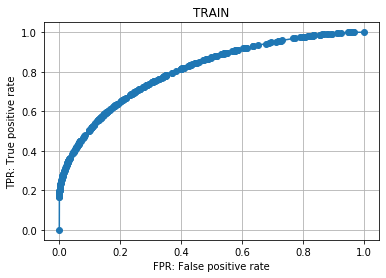

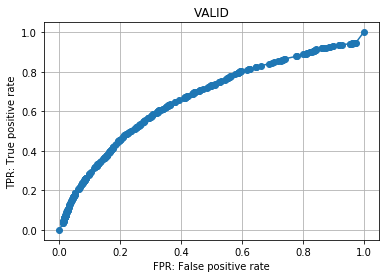

In [25]:
# DecisionTreeRegressor max_depth=15
dtree_depth15 = DecisionTreeRegressor(max_depth=15)
ml_def(X_train_std, y_train, X_valid_std, y_valid, dtree_depth15)

In [26]:
# 特徴量の重要度
# DecisionTreeRegressor max_depth=15でも確認
fti_dtree_depth15 = dtree_depth15.feature_importances_

print('Feature Importances:')
for i, feat in enumerate(df.columns):
    print('\t{0:20s} : {1:>.6f}'.format(feat, fti_dtree_depth15[i]))
    
# ソートで高いのサーチ
feat_dict_dtree_depth15 = sorted(dict(zip(fti_dtree_depth15, df.columns)).items())
feat_dict_dtree_depth15

Feature Importances:
	SK_ID_CURR           : 0.034491
	CNT_CHILDREN         : 0.001712
	AMT_INCOME_TOTAL     : 0.019943
	AMT_CREDIT           : 0.020483
	AMT_ANNUITY          : 0.029244
	AMT_GOODS_PRICE      : 0.023346
	REGION_POPULATION_RELATIVE : 0.019686
	DAYS_BIRTH           : 0.038992
	DAYS_EMPLOYED        : 0.027267
	DAYS_REGISTRATION    : 0.027393
	DAYS_ID_PUBLISH      : 0.029974
	OWN_CAR_AGE          : 0.010253
	FLAG_MOBIL           : 0.000000
	FLAG_EMP_PHONE       : 0.000000
	FLAG_WORK_PHONE      : 0.001966
	FLAG_CONT_MOBILE     : 0.000424
	FLAG_PHONE           : 0.002658
	FLAG_EMAIL           : 0.001217
	CNT_FAM_MEMBERS      : 0.006625
	REGION_RATING_CLIENT : 0.000985
	REGION_RATING_CLIENT_W_CITY : 0.002357
	HOUR_APPR_PROCESS_START : 0.019251
	REG_REGION_NOT_LIVE_REGION : 0.000504
	REG_REGION_NOT_WORK_REGION : 0.000078
	LIVE_REGION_NOT_WORK_REGION : 0.000000
	REG_CITY_NOT_LIVE_CITY : 0.001752
	REG_CITY_NOT_WORK_CITY : 0.003125
	LIVE_CITY_NOT_WORK_CITY : 0.001354
	EXT_SOURCE_1

[(0.0, 'WALLSMATERIAL_MODE_Wooden'),
 (5.216378533601018e-05, 'NAME_HOUSING_TYPE_Office apartment'),
 (5.323854785941447e-05, 'FLAG_DOCUMENT_15'),
 (7.419661801551491e-05, 'ORGANIZATION_TYPE_Security Ministries'),
 (7.761473941630528e-05, 'REG_REGION_NOT_WORK_REGION'),
 (0.00010595516383752713, 'FLAG_DOCUMENT_7'),
 (0.00011135396650429888, 'HOUSETYPE_MODE_block of flats'),
 (0.00011408015720010164, 'NAME_HOUSING_TYPE_Co-op apartment'),
 (0.00011960240846758026, 'OCCUPATION_TYPE_Accountants'),
 (0.00015946987795677366, 'NAME_CONTRACT_TYPE_Cash loans'),
 (0.00017940361270137037, 'HOUSETYPE_MODE_terraced house'),
 (0.00018983704022235468, 'ORGANIZATION_TYPE_Industry: type 8'),
 (0.00019185701047074165, 'OCCUPATION_TYPE_IT staff'),
 (0.0002077369684585926, 'FLAG_DOCUMENT_11'),
 (0.00021201601090336985, 'NAME_TYPE_SUITE_Group of people'),
 (0.0002122168726034068, 'FLAG_DOCUMENT_13'),
 (0.00021234329241047445, 'ORGANIZATION_TYPE_Security'),
 (0.00021262650394236488, 'NAME_TYPE_SUITE_Family')

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train
fpr： [0.00000000e+00 4.71922944e-06 1.00000000e+00]
tpr： [0.        0.1751895 1.       ]
thresholds： [2 1 0]
roc_auc_score :  0.5875923879031599

valid
fpr： [0.00000000e+00 6.21583059e-04 1.00000000e+00]
tpr： [0.         0.00295518 1.        ]
thresholds： [2 1 0]
roc_auc_score :  0.5011667983571999


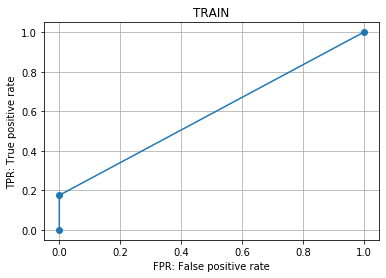

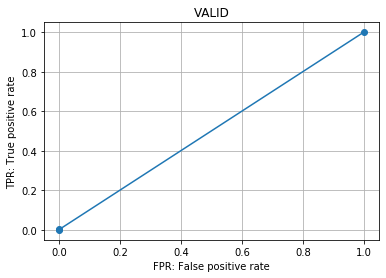

In [27]:
# ランダムフォレスト　max_depth=20
rfc_20 = RandomForestClassifier(max_depth=20)
ml_def(X_train_std, y_train, X_valid_std, y_valid, rfc_20)

* 決定木で多少効果あり
* ランダムフォレストでは効果なし  
→特徴量の相関の問題か？  →主成分分析で次元抽出を試す

In [28]:
# 主成分分析で次元抽出
# 分割、標準化後のtrainを使用
# validのPCAはtrainベース適用
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
X_valid_pca = pca.transform(X_valid_std)

# pca後の中身を確認するためにDF化
X_train_pca = pd.DataFrame(X_train_pca) 
X_valid_pca = pd.DataFrame(X_valid_pca) 

In [29]:
# pca後の中身確認
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,-3.211662,1.074285,0.646691,0.041010,-0.127652,3.021276,-1.114329,-0.886385,-3.176329,2.971415,...,7.743629e-16,2.769167e-15,-1.369452e-15,4.823723e-16,-1.367676e-15,-1.143257e-15,-1.305280e-18,1.884680e-16,1.149297e-15,4.314571e-16
1,0.079845,0.918851,-5.195798,2.856671,-0.090797,-1.137550,-1.093197,-0.105945,-0.461748,-0.183025,...,-5.745941e-14,-4.528286e-14,2.178043e-14,-6.033527e-18,-2.314135e-14,2.841270e-14,-4.216578e-15,-2.543610e-14,-4.152393e-14,2.112940e-15
2,-0.018428,-4.720564,-0.104670,-1.259647,0.741933,0.750463,-0.882147,-0.146375,0.728748,-0.638298,...,-2.085716e-14,4.062385e-15,-1.695538e-14,-1.365020e-14,-4.871293e-15,-1.089500e-14,-4.859772e-16,5.884603e-15,-8.355634e-15,1.315245e-14
3,-0.063272,1.283353,0.957087,-2.827370,1.949553,-0.531873,-0.585153,0.717773,1.205908,4.780289,...,-2.688310e-14,1.815707e-15,-1.938364e-14,-3.107410e-15,6.429571e-15,-1.238073e-14,-3.780009e-15,8.887698e-15,-1.181811e-14,1.116834e-14
4,-1.864465,1.785005,-1.690627,-0.871930,-0.501159,1.181887,0.470933,0.380744,2.224040,2.674845,...,-2.850643e-14,2.985818e-14,-1.239982e-14,1.359515e-14,-5.685793e-15,-1.837306e-14,-6.927737e-15,1.670863e-14,-1.078976e-15,9.145938e-15


In [30]:
# 各分散の寄与率のうち合計80％の特徴を取得
pca_num = 0
while pca.explained_variance_ratio_[:pca_num].sum() < 0.8:
    pca_num += 1
pca_num

129

train
fpr： [0.00000000e+00 0.00000000e+00 4.71922944e-06 9.43845889e-06
 1.41576883e-05 1.88769178e-05 2.83153767e-05 3.30346061e-05
 3.77538356e-05 4.24730650e-05 4.71922944e-05 8.49461300e-05
 1.03823048e-04 1.13261507e-04 1.36857654e-04 2.02926866e-04
 2.17084554e-04 2.35961472e-04 2.64276849e-04 2.97311455e-04
 3.86976814e-04 4.15292191e-04 4.38888338e-04 4.71922944e-04
 5.28553698e-04 5.52149845e-04 5.66307533e-04 5.85184451e-04
 6.13499828e-04 7.83392088e-04 8.21145923e-04 9.15530512e-04
 9.67442036e-04 9.91038183e-04 1.00991510e-03 1.16564967e-03
 1.33554193e-03 1.38273423e-03 1.44880344e-03 1.66588799e-03
 1.69892260e-03 1.76027258e-03 1.86881486e-03 1.92544561e-03
 2.13781094e-03 2.15668786e-03 2.18028400e-03 2.26523013e-03
 2.36433395e-03 2.48703392e-03 2.69939924e-03 2.77962614e-03
 2.84569535e-03 2.89288765e-03 3.17132219e-03 3.23739140e-03
 3.42616058e-03 3.54886054e-03 3.61964898e-03 3.73291049e-03
 3.93583736e-03 4.00190657e-03 4.03966040e-03 4.14348345e-03
 4.17651806e-

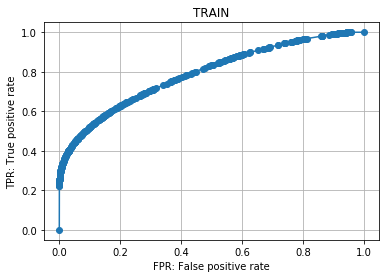

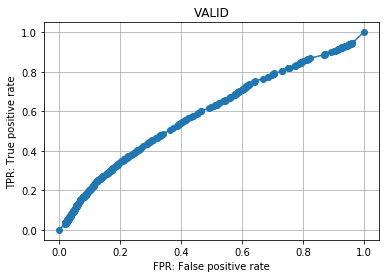

In [31]:
# PCA、DecisionTreeRegressor max_depth=15
dtree_depth15_pca = DecisionTreeRegressor(max_depth=15)
ml_def(X_train_pca.iloc[:, :pca_num], y_train, X_valid_pca.iloc[:, :pca_num], y_valid, dtree_depth15_pca)

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train
fpr： [0.00000000e+00 1.41576883e-05 1.00000000e+00]
tpr： [0.         0.36297641 1.        ]
thresholds： [2 1 0]
roc_auc_score :  0.6814811244226214

valid
fpr： [0.        0.0016811 1.       ]
tpr： [0.         0.00508948 1.        ]
thresholds： [2 1 0]
roc_auc_score :  0.5017041883197673


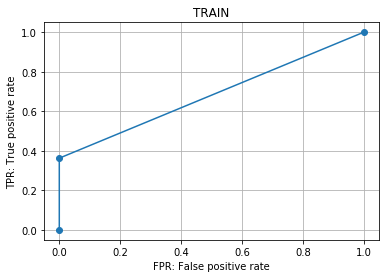

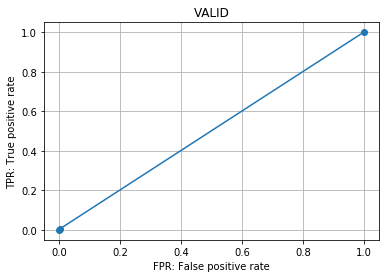

In [32]:
# PCA、RandomForestClassifier max_depth=20
rfc_20_pca = RandomForestClassifier(max_depth=20)
ml_def(X_train_pca.iloc[:, :pca_num], y_train, X_valid_pca.iloc[:, :pca_num], y_valid, rfc_20_pca)

* PCAの効果なし、逆に悪くなっている  
→試しにランダムフォレストで得た特徴量の重要度を用いて次元削減を試す

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train
fpr： [0.00000000e+00 3.30346061e-05 1.00000000e+00]
tpr： [0.         0.82374293 1.        ]
thresholds： [2 1 0]
roc_auc_score :  0.9118549463459257

valid
fpr： [0.         0.00412505 1.        ]
tpr： [0.         0.01805943 1.        ]
thresholds： [2 1 0]
roc_auc_score :  0.5069671903694044


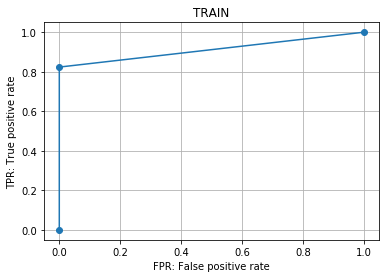

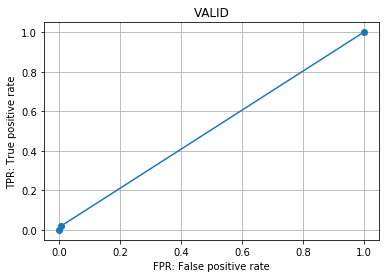

In [33]:
# ターゲットとの重要度が高い特徴量のみの学習
# ランダムフォレストで得た「重要度の高い特徴量」
# 今回は適当に上位10個

# 上位10個の列番号を取得（feat_dictが昇順の重要度リスト）
columns_num = []
for value, column in feat_dict[-10:]:
    columns_num.append(X.columns.get_loc(column))
# 取得した列番号を使用し標準化後のXから必要列のみ抽出
X_train_std_feat10 = X_train_std[:, columns_num]
X_valid_std_feat10 = X_valid_std[:, columns_num]

# 「重要度の高い特徴量」のみでランダムフォレスト
rfc_feat10 = RandomForestClassifier()
ml_def(X_train_std_feat10, y_train, X_valid_std_feat10, y_valid, rfc_feat10)

train
fpr： [0.00000000e+00 0.00000000e+00 1.41576883e-05 1.88769178e-05
 2.35961472e-05 2.83153767e-05 3.77538356e-05 5.66307533e-05
 6.60692122e-05 7.55076711e-05 8.96653594e-05 1.36857654e-04
 1.88769178e-04 2.02926866e-04 2.21803784e-04 2.64276849e-04
 3.11469143e-04 3.30346061e-04 3.68099897e-04 4.67203715e-04
 5.00238321e-04 7.64515170e-04 8.02269006e-04 8.25865153e-04
 9.10811283e-04 9.62722807e-04 1.03823048e-03 1.15149198e-03
 1.18452659e-03 1.23171888e-03 1.28834964e-03 1.32138424e-03
 1.53846880e-03 1.56206495e-03 1.69420337e-03 1.72723798e-03
 1.76499181e-03 2.16140709e-03 2.31242243e-03 2.49175315e-03
 2.61917234e-03 2.68524155e-03 2.71355693e-03 2.78906460e-03
 2.93536071e-03 2.95895686e-03 3.02030684e-03 3.69043743e-03
 3.78482201e-03 4.01134503e-03 4.31809494e-03 4.54933718e-03
 5.00238321e-03 5.32801004e-03 5.45071001e-03 5.52621768e-03
 5.70082917e-03 5.88015989e-03 6.04533292e-03 6.25297901e-03
 6.55029047e-03 6.92310959e-03 6.96558266e-03 7.06940571e-03
 7.19210567e-

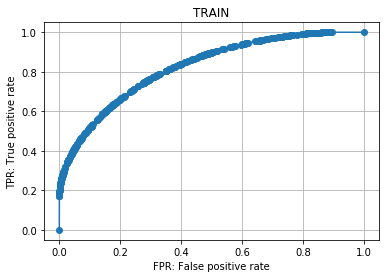

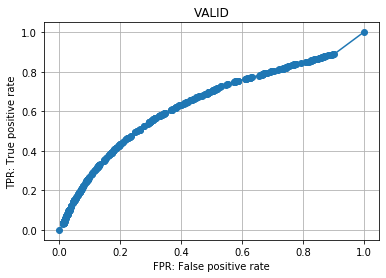

In [34]:
# 「重要度の高い特徴量」決定木
# max_depthは結果が良かった「１５」に設定
dtree__feat10_depth15 = DecisionTreeRegressor(max_depth=15)
ml_def(X_train_std_feat10, y_train, X_valid_std_feat10, y_valid, dtree__feat10_depth15)

* やはり結果が悪くなっている  
→次元削減は逆効果、一方で現状の特徴量のままでは過学習→特徴量を独立にする

In [35]:
# ICAによる次元削減（特徴量同士を独立にする）
# PCAによる無相関の特徴量を使用
from sklearn.decomposition import FastICA
fica = FastICA()
X_train_pca_fica = fica.fit_transform(X_train_pca)
X_valid_pca_fica = fica.transform(X_valid_pca)

# pca後の中身を確認するためにDF化
X_train_pca_fica = pd.DataFrame(X_train_pca_fica) 
X_valid_pca_fica = pd.DataFrame(X_valid_pca_fica) 

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


In [36]:
# ica後の中身確認
X_train_pca_fica.head()

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,-0.001173,0.000262,-0.000236,-0.020691,0.001851,0.001812,0.000533,0.000419,-0.000210,0.000272,...,0.000050,0.005090,-0.001727,0.001466,-0.000409,-0.000186,-0.002553,-0.000261,-0.000615,0.000983
1,0.002300,0.006553,0.019681,-0.072681,0.011123,0.008623,0.015196,0.015669,-0.011822,0.018840,...,-0.006347,-0.002112,-0.017398,-0.042183,-0.006992,-0.008336,0.004745,0.007571,-0.010998,0.003986
2,-0.002826,-0.001753,-0.002360,-0.065118,-0.002231,-0.003178,-0.002510,-0.003822,0.013750,-0.003305,...,0.001568,0.003612,0.015816,0.003178,0.001881,0.002549,-0.008198,-0.002490,0.001643,0.001958
3,-0.000484,-0.002487,-0.002178,0.020541,0.009977,-0.001912,-0.002545,-0.005595,0.000979,-0.005461,...,-0.001878,0.011330,-0.004578,0.001288,-0.001847,0.002928,-0.014338,-0.003247,0.017502,0.002908
4,-0.001164,-0.003319,-0.009068,0.036521,0.024022,-0.006499,-0.006875,-0.006872,-0.015901,-0.016552,...,-0.018135,0.017873,-0.017047,0.012768,-0.007346,0.004965,-0.034409,-0.004171,0.004874,0.002791


train
fpr： [0.00000000e+00 0.00000000e+00 4.71922944e-06 9.43845889e-06
 1.41576883e-05 1.88769178e-05 2.35961472e-05 2.83153767e-05
 4.24730650e-05 4.71922944e-05 8.49461300e-05 1.13261507e-04
 1.32138424e-04 1.60453801e-04 1.93488407e-04 2.12365325e-04
 2.26523013e-04 2.64276849e-04 2.78434537e-04 3.11469143e-04
 3.30346061e-04 3.82257585e-04 4.38888338e-04 4.57765256e-04
 5.28553698e-04 5.52149845e-04 6.51253663e-04 7.03165187e-04
 7.69234399e-04 1.04294971e-03 1.10429969e-03 1.29306887e-03
 1.40161114e-03 1.60925724e-03 1.75555335e-03 1.83106102e-03
 1.85465717e-03 2.01983020e-03 2.05758404e-03 2.08589941e-03
 2.59557619e-03 2.71355693e-03 2.86929150e-03 4.22371035e-03
 4.25674496e-03 4.34169109e-03 5.34216773e-03 5.54981383e-03
 5.89903681e-03 6.09724444e-03 6.16803288e-03 8.02740928e-03
 8.20674000e-03 8.58899759e-03 1.32044040e-02 1.33365424e-02
 1.35064347e-02 1.35772231e-02 1.62907800e-02 1.65173031e-02
 1.65786530e-02 1.66777569e-02 1.70411375e-02 1.89335485e-02
 1.94007522e-

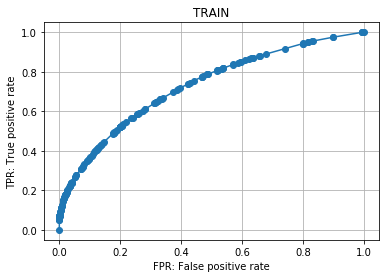

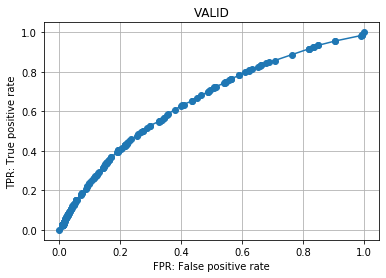

In [37]:
# ICAにて作成した特徴量全て使用
# PCA→ICA、DecisionTreeRegressor max_depth=10
dtree_depth10_pca_fica = DecisionTreeRegressor(max_depth=10)
ml_def(X_train_pca_fica, y_train, X_valid_pca_fica, y_valid, dtree_depth10_pca_fica)

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train
fpr： [0.00000000e+00 5.19115239e-05 1.00000000e+00]
tpr： [0.         0.64422974 1.        ]
thresholds： [2 1 0]
roc_auc_score :  0.822088915594948

valid
fpr： [0.         0.07546583 1.        ]
tpr： [0.        0.0991627 1.       ]
thresholds： [2 1 0]
roc_auc_score :  0.5118484324710544


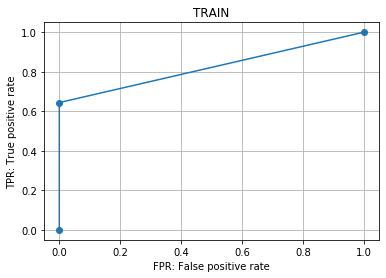

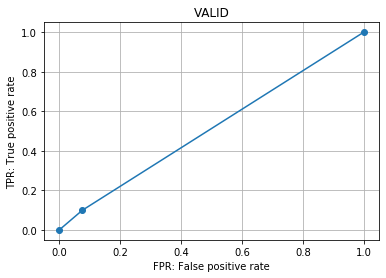

In [38]:
# ICAにて作成した特徴量全て使用
# PCA→ICA、RandomForestClassifier max_depth=30
rfc_depth30_pca_fica = RandomForestClassifier(max_depth=30)
ml_def(X_train_pca_fica, y_train, X_valid_pca_fica, y_valid, rfc_depth30_pca_fica)

In [39]:
# 特徴量の高次元化→２次元
# 全てに適応すると計算コスト高いので、数字型のみ適用
# 標準化後の特徴量を使用（PCA、ICA前）

# 数字型の列数は１０５（targetを省く）
# Xのラベルデータは右から結合したため、左から105番目までが数字型の特徴量
# Xの左から105番目までを二次元化
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_std[:, :105])
X_train_poly.shape

(230633, 5671)

In [40]:
# validも同様に２次元化
X_valid_poly = poly.transform(X_valid_std[:, :105])
X_valid_poly.shape

(76878, 5671)

In [41]:
# 二次元とラベルデータを合体
X_train_polys = np.concatenate([X_train_poly, X_train_std[:, 105:]], 1)
# 元のデータshapeを確認
print(X_train_std.shape)
print(X_train_poly.shape)

(230633, 245)
(230633, 5671)


In [42]:
# 結合したデータshapeを確認（ちゃんと加算されているか確認）
X_train_polys.shape

(230633, 5811)

In [43]:
# validも同様に、二次元とラベルデータを合体
X_valid_polys = np.concatenate([X_valid_poly, X_valid_std[:, 105:]], 1)
# 結合したデータshapeを確認（ちゃんと加算されているか確認）
X_valid_polys.shape

(76878, 5811)

In [44]:
# 二次元化後の特徴量全て使用→計算コストが高い
# 主成分分析で次元削減（ICAでは計算コストが高過ぎ）
# 計算コスト高いため５まで
pca_polys = PCA(n_components=5)
X_train_polys_pca = pca_polys.fit_transform(X_train_polys)
X_valid_polys_pca = pca_polys.transform(X_valid_polys)

In [45]:
# 各分散の寄与率のうち合計80％の特徴を取得
#polys_pca_num = 0
#while pca_polys.explained_variance_ratio_[:polys_pca_num].sum() < 0.8:
#    polys_pca_num += 1
#polys_pca_num

# 寄与率の合計
pca_polys.explained_variance_ratio_.sum()

0.898246259150458

train
fpr： [0.00000000e+00 0.00000000e+00 4.71922944e-06 9.43845889e-06
 1.88769178e-05 3.30346061e-05 5.66307533e-05 1.27419195e-04
 1.46296113e-04 2.78434537e-04 2.97311455e-04 4.20011421e-04
 4.53046027e-04 4.95519092e-04 5.28553698e-04 6.04061369e-04
 6.27657516e-04 6.55972893e-04 9.91038183e-04 1.03351125e-03
 1.06182662e-03 1.08542277e-03 1.23643811e-03 1.34498039e-03
 1.47239959e-03 1.68476491e-03 1.85465717e-03 1.92544561e-03
 2.00095328e-03 2.11421479e-03 2.19444169e-03 2.31242243e-03
 2.86929150e-03 2.98727224e-03 3.21851448e-03 3.34593368e-03
 3.48751056e-03 3.55357977e-03 3.88392583e-03 4.22842958e-03
 4.45495260e-03 4.53989873e-03 4.66259869e-03 4.83721018e-03
 4.87496402e-03 4.97878706e-03 5.13924086e-03 5.40823694e-03
 6.10196367e-03 6.26713670e-03 6.45118665e-03 6.71546350e-03
 6.85704038e-03 7.25817489e-03 7.69706322e-03 7.92830547e-03
 8.24921307e-03 8.30112459e-03 1.02784817e-02 1.14346929e-02
 1.19113351e-02 1.20529120e-02 1.21425774e-02 1.33459809e-02
 1.39453230e-

roc_auc_score :  0.5571803916841156


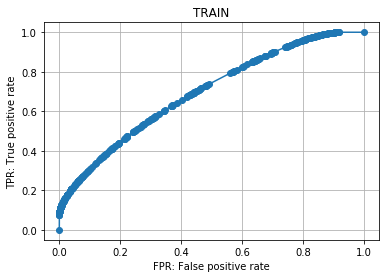

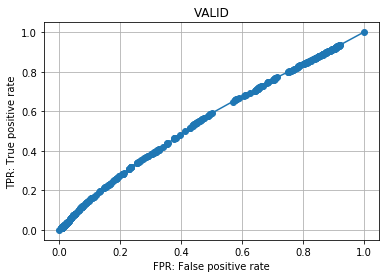

In [46]:
# polys_PCA、DecisionTreeRegressor max_depth=15
dtree_depth15_polys_pca = DecisionTreeRegressor(max_depth=15)
ml_def(X_train_polys_pca, y_train, X_valid_polys_pca, y_valid, dtree_depth15_polys_pca)

train
fpr： [0.00000000e+00 0.00000000e+00 1.41576883e-05 2.83153767e-05
 3.30346061e-05 3.77538356e-05 6.13499828e-05 8.96653594e-05
 9.91038183e-05 1.41576883e-04 2.07646096e-04 2.26523013e-04
 2.54838390e-04 2.83153767e-04 3.72819126e-04 3.91696044e-04
 4.15292191e-04 5.37992157e-04 5.85184451e-04 6.51253663e-04
 7.78672858e-04 8.35303612e-04 8.77776677e-04 1.47711882e-03
 1.61869570e-03 1.67060722e-03 1.95848022e-03 2.01511097e-03
 2.03398789e-03 2.05758404e-03 2.44456085e-03 2.50591083e-03
 2.61917234e-03 2.81737998e-03 2.86457227e-03 3.27514523e-03
 3.32705676e-03 3.41200289e-03 3.50166825e-03 3.53942208e-03
 5.10620626e-03 5.12980241e-03 5.19587162e-03 5.28081775e-03
 5.37520234e-03 5.45542924e-03 5.63475996e-03 6.31904823e-03
 6.79097117e-03 7.54604788e-03 7.63571324e-03 7.71594014e-03
 7.83864011e-03 8.01325160e-03 8.15010925e-03 8.19258232e-03
 1.19868428e-02 1.21284197e-02 1.59840301e-02 1.63096570e-02
 1.67296684e-02 1.68570876e-02 1.87636563e-02 1.89052332e-02
 1.89901793e-


valid
fpr： [0.         0.00179411 0.00190713 0.00200602 0.00202014 0.00209078
 0.00217554 0.00227443 0.00235919 0.00250046 0.00281125 0.00296665
 0.00300903 0.00309379 0.00329156 0.00340458 0.00350347 0.00384251
 0.00392727 0.00399791 0.00419569 0.00428045 0.00433695 0.00531171
 0.00555187 0.00565076 0.00608869 0.00615932 0.00618758 0.00625821
 0.00685154 0.00697868 0.00723297 0.00747312 0.00758614 0.00800995
 0.00808058 0.00826423 0.00834899 0.0084055  0.0099312  0.00994533
 0.01000184 0.01004422 0.01027025 0.01031263 0.0105104  0.01132976
 0.01193722 0.01284134 0.01291198 0.01306737 0.01315213 0.01334991
 0.01347705 0.01351943 0.01710766 0.01716417 0.02123271 0.02151525
 0.02189668 0.02202382 0.02387444 0.02401571 0.02410047 0.02438301
 0.02866346 0.02873409 0.02894599 0.02901663 0.02932742 0.02944043
 0.03239295 0.03301454 0.0335231  0.03413056 0.03431421 0.04037465
 0.04151892 0.04519191 0.05588597 0.05621089 0.05649342 0.05719977
 0.06228545 0.06269513 0.0634156  0.06453162 0.067

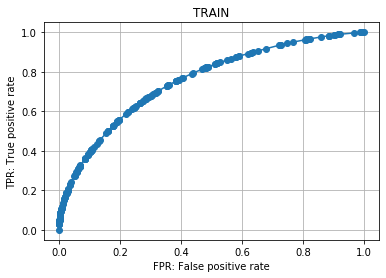

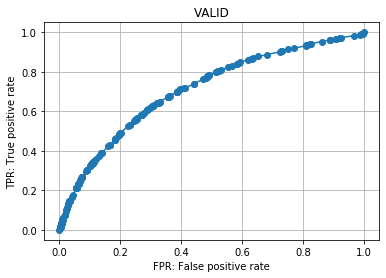

In [47]:
# 決定木の別ハイパーパラメータ調整　葉
# DecisionTreeRegressor max_depth=10, min_samples_leaf=2
dtree_depth10_leaf2 = DecisionTreeRegressor(max_depth=10, min_samples_leaf=2)
ml_def(X_train_std, y_train, X_valid_std, y_valid, dtree_depth10_leaf2)

train
fpr： [0. 0. 1.]
tpr： [0.         0.45206576 1.        ]
thresholds： [2 1 0]
roc_auc_score :  0.7260328813921213

valid
fpr： [0.00000000e+00 2.40157091e-04 1.00000000e+00]
tpr： [0.         0.00623871 1.        ]
thresholds： [2 1 0]
roc_auc_score :  0.5029992778820204


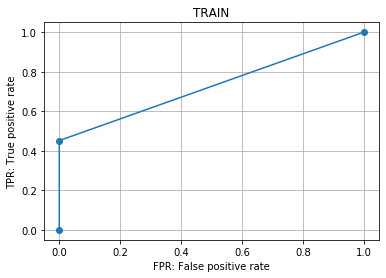

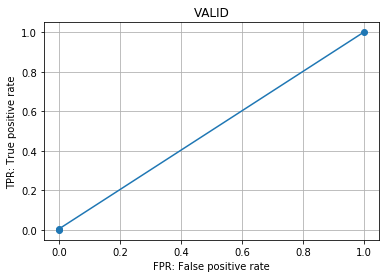

In [48]:
# ランダムフォレストの別ハイパーパラメータ調整　葉
# RandomForestClassifier max_depth=20, min_samples_leaf=2
rfc_depth20_leaf2 = RandomForestClassifier(n_estimators=20, min_samples_leaf=2)
ml_def(X_train_std, y_train, X_valid_std, y_valid, rfc_depth20_leaf2)

In [49]:
# learning, GridSearchCV、決定木
import sklearn
diparameter_dtree={"min_samples_leaf":[i for i in range(1, 9, 2)], "max_depth":[i for i in range(2, 12, 2)], "random_state":[123],}
# "criterion":["gini", "entropy"], 
licv_dtree=sklearn.model_selection.GridSearchCV(DecisionTreeRegressor(), param_grid=diparameter_dtree, cv=5, n_jobs=5)
licv_dtree.fit(X_train_std, y_train)
predictor_dtree=licv_dtree.best_estimator_
# ベストパラメータの保存
#sklearn.externals.joblib.dump(predictor_dtree,"predictor_dtree.pkl",compress=True)

train
fpr： [0.00000000e+00 4.71922944e-06 1.41576883e-05 2.35961472e-05
 4.24730650e-05 6.13499828e-05 2.35961472e-04 1.36857654e-03
 1.38745346e-03 2.20388015e-03 2.56254159e-03 2.60973388e-03
 2.64748772e-03 3.82257585e-03 9.79240110e-03 1.21944889e-02
 1.23313465e-02 1.25861849e-02 1.37329577e-02 1.50213073e-02
 2.23738668e-02 2.26145475e-02 2.31761358e-02 3.10761259e-02
 3.14772604e-02 4.12130307e-02 5.76831415e-02 5.99766870e-02
 6.12367213e-02 6.33509361e-02 6.94623382e-02 6.99672957e-02
 7.04297802e-02 7.10338416e-02 7.41107792e-02 8.23788692e-02
 1.36810462e-01 1.70109345e-01 1.75262743e-01 1.77636516e-01
 1.83535552e-01 1.85796063e-01 2.10364372e-01 2.36249345e-01
 3.56702958e-01 3.62597275e-01 3.64650140e-01 3.83074012e-01
 3.98840957e-01 4.07986824e-01 4.08652235e-01 4.14777795e-01
 4.31733986e-01 4.56014422e-01 5.66590687e-01 5.76132969e-01
 6.15326170e-01 7.47450436e-01 7.58762429e-01 7.60088533e-01
 7.97818772e-01 8.05992478e-01 8.40216329e-01 1.00000000e+00]
tpr： [0.    

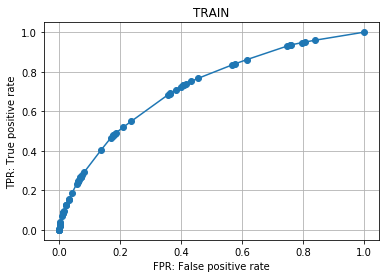

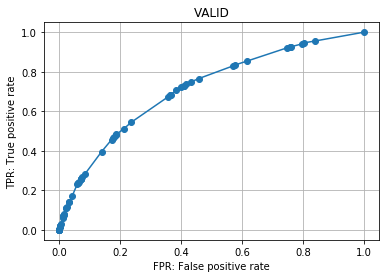

In [50]:
# trainの予測
y_train_predict_licv_dtree=predictor_dtree.predict(X_train_std)
# trainのROCによる評価
fpr_train_model, tpr_train_model, thresholds_train_model = roc_curve(y_train, y_train_predict_licv_dtree)
print('train\nfpr：', fpr_train_model)
print('tpr：', tpr_train_model)
print('thresholds：', thresholds_train_model)
print("roc_auc_score : ", roc_auc_score(y_train, y_train_predict_licv_dtree))

# trainの予測
y_valid_predict_licv_dtree=predictor_dtree.predict(X_valid_std)
# validのROCによる評価
fpr_valid_model, tpr_valid_model, thresholds_valid_model = roc_curve(y_valid, y_valid_predict_licv_dtree, drop_intermediate=False)
print('\nvalid\nfpr：', fpr_valid_model)
print('tpr：', tpr_valid_model)
print('thresholds：', thresholds_valid_model)
print("roc_auc_score : ", roc_auc_score(y_valid, y_valid_predict_licv_dtree))
     
# trainのROC曲線
plt.figure()
plt.plot(fpr_train_model, tpr_train_model, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.title('TRAIN')
plt.grid()

# validのROC曲線
plt.figure()
plt.plot(fpr_valid_model, tpr_valid_model, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.title('VALID')
plt.grid();

# 4. printing parameters of the predictor
print(sorted(predictor_dtree.get_params(True).items()))

# 5. printing importances of the predictor
print(predictor_dtree.feature_importances_)

train
fpr： [0.00000000e+00 0.00000000e+00 4.71922944e-06 9.43845889e-06
 1.41576883e-05 4.24730650e-05 5.66307533e-05 9.43845889e-05
 1.13261507e-04 1.17980736e-04 1.55734572e-04 1.69892260e-04
 2.35961472e-04 8.96653594e-04 9.29688201e-04 9.67442036e-04
 1.01463433e-03 1.02407279e-03 1.11845738e-03 1.91128792e-03
 2.79378383e-03 3.43087981e-03 3.73762972e-03 5.32329081e-03
 5.37992157e-03 5.71498686e-03 6.03589446e-03 6.04533292e-03
 6.12555982e-03 1.00330818e-02 1.03728663e-02 1.14866045e-02
 1.17697582e-02 1.19254928e-02 1.22983119e-02 1.23596619e-02
 1.83861179e-02 2.26287052e-02 2.87353881e-02 2.91412418e-02
 3.02832953e-02 3.12932104e-02 3.14111912e-02 3.20530064e-02
 3.22984063e-02 3.28033639e-02 3.39878905e-02 4.10431385e-02
 4.11422423e-02 4.22135074e-02 4.23314881e-02 4.29733033e-02
 4.40492876e-02 4.46627875e-02 4.47571720e-02 4.99672014e-02
 5.04910358e-02 5.08827319e-02 5.70413263e-02 8.53802991e-02
 8.92075942e-02 9.41627851e-02 9.46394273e-02 9.47904426e-02
 9.49697733e-

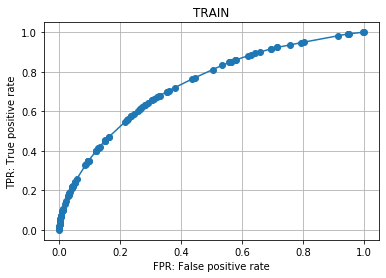

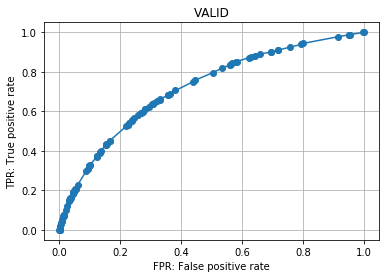

In [74]:
# グリッドサーチ　スコアをroc_auc_scoreに変更
diparameter_dtree={"min_samples_leaf":[i for i in range(1, 9, 2)], "max_depth":[i for i in range(2, 12, 2)], "random_state":[123],}
# "criterion":["gini", "entropy"], 
licv_dtree=sklearn.model_selection.GridSearchCV(DecisionTreeRegressor(),
                                                param_grid=diparameter_dtree, cv=5, n_jobs=-1,scoring='roc_auc')
licv_dtree.fit(X_train_std, y_train)
predictor_dtree=licv_dtree.best_estimator_

# trainの予測
y_train_predict_licv_dtree=predictor_dtree.predict(X_train_std)
# trainのROCによる評価
fpr_train_model, tpr_train_model, thresholds_train_model = roc_curve(y_train, y_train_predict_licv_dtree)
print('train\nfpr：', fpr_train_model)
print('tpr：', tpr_train_model)
print('thresholds：', thresholds_train_model)
print("roc_auc_score : ", roc_auc_score(y_train, y_train_predict_licv_dtree))

# trainの予測
y_valid_predict_licv_dtree=predictor_dtree.predict(X_valid_std)
# validのROCによる評価
fpr_valid_model, tpr_valid_model, thresholds_valid_model = roc_curve(y_valid, y_valid_predict_licv_dtree, drop_intermediate=False)
print('\nvalid\nfpr：', fpr_valid_model)
print('tpr：', tpr_valid_model)
print('thresholds：', thresholds_valid_model)
print("roc_auc_score : ", roc_auc_score(y_valid, y_valid_predict_licv_dtree))
     
# trainのROC曲線
plt.figure()
plt.plot(fpr_train_model, tpr_train_model, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.title('TRAIN')
plt.grid()

# validのROC曲線
plt.figure()
plt.plot(fpr_valid_model, tpr_valid_model, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.title('VALID')
plt.grid();

# 4. printing parameters of the predictor
print(sorted(predictor_dtree.get_params(True).items()))

# 5. printing importances of the predictor
print(predictor_dtree.feature_importances_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,29.368455,0.149201,0.531122,0.141575,2,1,123,"{'max_depth': 2, 'min_samples_leaf': 1, 'rando...",0.654890,0.647570,0.642447,0.639003,0.655697,0.647922,0.006613,17
1,26.998075,2.890018,0.547385,0.112428,2,3,123,"{'max_depth': 2, 'min_samples_leaf': 3, 'rando...",0.654890,0.647570,0.642447,0.639003,0.655697,0.647922,0.006613,17
2,23.560604,0.057923,0.470776,0.062494,2,5,123,"{'max_depth': 2, 'min_samples_leaf': 5, 'rando...",0.654890,0.647570,0.642447,0.639003,0.655697,0.647922,0.006613,17
3,26.067672,1.229172,0.640187,0.103442,2,7,123,"{'max_depth': 2, 'min_samples_leaf': 7, 'rando...",0.654890,0.647570,0.642447,0.639003,0.655697,0.647922,0.006613,17
4,30.896304,5.379149,0.286026,0.055237,4,1,123,"{'max_depth': 4, 'min_samples_leaf': 1, 'rando...",0.699177,0.698762,0.688655,0.701291,0.699865,0.697550,0.004530,13


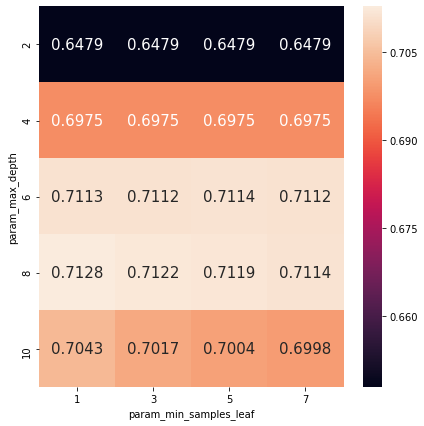

In [81]:
# スコア表示
score_df = pd.DataFrame(licv_dtree.cv_results_)
display(score_df.head())
# スコアのヒートマップ
ex_score_df = score_df.pivot(index='param_max_depth', columns='param_min_samples_leaf', values='mean_test_score')
plt.figure(figsize=(7, 7))
sns.heatmap(ex_score_df, cbar=True, annot=True, square=True,
            fmt='.4f', annot_kws={'size':15});

In [71]:
# SGDClassifier（サンプル数多い）、グリッドサーチ　＋　PCAや二次元の前後で結果を比較！！

In [77]:
# Nested Cross Validation (Nested CV)

In [53]:
# pca、icaは特徴同士の無相関、独立化による次元削減　→　基本的に削減すると情報量減少しスコアは悪化する（計算コストの削減が目的）
# ・・・不要な次元で学習すると過学習？だから次元削減が有効？
# nanを含めてラベル（離散）化
# 特徴量の高次元化
# 特徴量の高次元分解・・・カーネルPCA
# ターゲットとの重要度が高い特徴量のみの学習

In [54]:
# SequentialFeatureSelector

cannot concatenate object of type "<class 'numpy.ndarray'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid